Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# !pip install --upgrade pip
# !pip install tf-nightly

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# common_fldr = pathlib.Path().parent.resolve()
# common_fldr = common_fldr/"CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/"
common_fldr = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration")
data_dir_train = common_fldr/"Train"
data_dir_test = common_fldr/"Test" 

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 6739 files belonging to 9 classes.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
val_ds.class_names

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

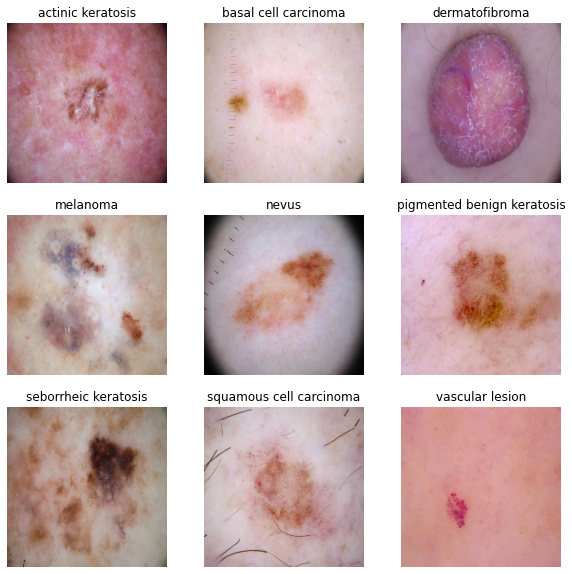

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
model = Sequential(
    [
        layers.experimental.preprocessing.Rescaling(scale=1./255),

        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(180,180,3)),
        # layers.MaxPooling2D(2),
        # layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),

        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        # layers.MaxPooling2D(2),
        # layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),

        layers.Flatten(),
        # layers.Dense(512, activation="relu", kernel_initializer='he_uniform'),
        layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
        layers.Dense(9),
        # layers.Activation('softmax')
    ]
)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# ### Todo, choose an appropirate optimiser and loss function
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
from keras.optimizers import SGD
optim = SGD(lr=0.0001, momentum=0.9)

model.compile(optimizer=optim, #keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=keras.metrics.SparseCategoricalAccuracy())

In [ ]:
# View the summary of all layers
# model.summary()

### Train the model

In [ ]:
epochs = 80
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 3s 40ms/step - loss: 1.1116 - sparse_categorical_accuracy: 0.6163 - val_loss: 2.1130 - val_sparse_categorical_accuracy: 0.3475
Epoch 2/20
70/70 [==============================] - 3s 38ms/step - loss: 1.0955 - sparse_categorical_accuracy: 0.6150 - val_loss: 2.0121 - val_sparse_categorical_accuracy: 0.3559
Epoch 3/20
70/70 [==============================] - 3s 38ms/step - loss: 1.0874 - sparse_categorical_accuracy: 0.6248 - val_loss: 2.2016 - val_sparse_categorical_accuracy: 0.3390
Epoch 4/20
70/70 [==============================] - 3s 38ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.6195 - val_loss: 2.0647 - val_sparse_categorical_accuracy: 0.3390
Epoch 5/20
70/70 [==============================] - 3s 38ms/step - loss: 1.0957 - sparse_categorical_accuracy: 0.6253 - val_loss: 1.9736 - val_s

### Visualizing training results

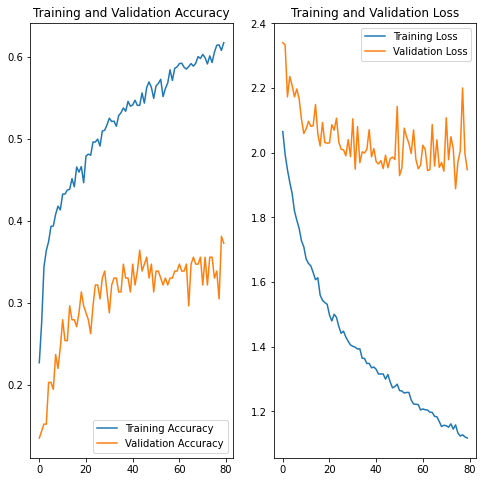

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
There is an overfitting given by the divergence in losses for train and validation.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# layers.RandomFlip("horizontal_and_vertical"),
# layers.RandomRotation(0.2),
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True,)
# val_datagen = ImageDataGenerator(rescale=1./255)

# # train_datagen.fit(train_ds)

# train_generator = train_datagen.flow_from_directory(
#         data_dir_train,
#         target_size=(180, 180),
#         batch_size=32,
#         shuffle=True,
#         seed=123,
#         class_mode='categorical',
#         )
# validation_generator = val_datagen.flow_from_directory(
#         data_dir_test,
#         target_size=(180, 180),
#         batch_size=32,
#         shuffle=True,
#         seed=123,
#         class_mode='categorical',
#         )

def augmentation(img):
  return Sequential(
    [
        layers.RandomFlip('horizontal_and_vertical', seed=123),
        layers.RandomRotation(0.1, seed=123),
        layers.RandomZoom(0.1, 0.1, seed=123),
        #layers.RandomHeight(factor=0.05, seed=123),
        #layers.RandomWidth(factor=0.05, seed=123),
        #layers.RandomContrast(factor=0.2, seed=123),
        # layers.RandomBrightness(factor=0.05, seed=123),
    ]
  )(img)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, rotation_range=90)
val_datagen = ImageDataGenerator() 
train_generator = train_datagen.flow_from_directory(
        data_dir_train,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='sparse')
validation_generator = val_datagen.flow_from_directory(
        data_dir_test,
        target_size=(180, 180),
        batch_size=batch_size, 
        class_mode='sparse') #'sparse', 'categorical

# it_train = datagen.flow(train_ds, batch_size=batch_size)
# it_train = datagen.flow(trainX, trainY, batch_size=batch_size)
# history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY), verbose=0)


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


(180, 180, 3)


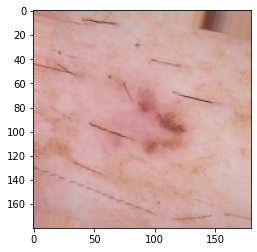

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
fig = plt.figure()
for X_batch, y_batch in train_generator:
    img = X_batch[0]
    print(img.shape)
    # img = augmentation(img)
    plt.imshow(img.astype('uint8'))
    plt.show()
    break

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
model = Sequential(
    [
        layers.experimental.preprocessing.Rescaling(scale=1./255),

        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(180,180,3)),
        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.2),

        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.2),

        layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.2),

        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
        layers.Dropout(0.2),

        layers.Dense(9),
        # layers.Activation('softmax')
    ]
)


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer=optim, #
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=keras.metrics.SparseCategoricalAccuracy())


### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
        train_generator,
        epochs=80,
        validation_data=validation_generator)


Epoch 1/80
70/70 [==============================] - 194s 3s/step - loss: 2.1616 - sparse_categorical_accuracy: 0.1813 - val_loss: 2.1607 - val_sparse_categorical_accuracy: 0.1356
Epoch 2/80
70/70 [==============================] - 161s 2s/step - loss: 2.0586 - sparse_categorical_accuracy: 0.1996 - val_loss: 2.1568 - val_sparse_categorical_accuracy: 0.1441
Epoch 3/80
70/70 [==============================] - 158s 2s/step - loss: 2.0410 - sparse_categorical_accuracy: 0.2104 - val_loss: 2.1416 - val_sparse_categorical_accuracy: 0.1949
Epoch 4/80
70/70 [==============================] - 156s 2s/step - loss: 2.0333 - sparse_categorical_accuracy: 0.2130 - val_loss: 2.1501 - val_sparse_categorical_accuracy: 0.1864
Epoch 5/80
70/70 [==============================] - 158s 2s/step - loss: 2.0122 - sparse_categorical_accuracy: 0.2287 - val_loss

### Visualizing the results

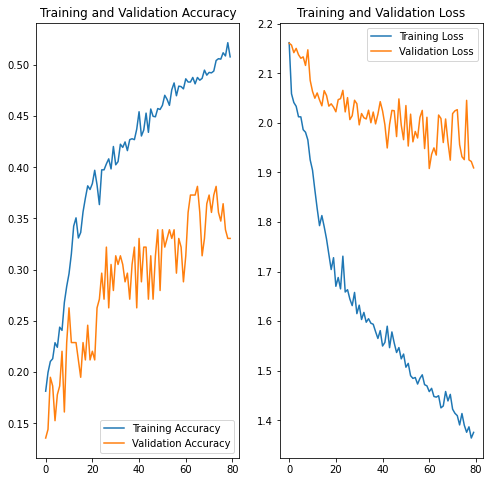

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Although an improvement, there is still some overfitting.
Especially, there is a divergence in loss values.
It is a good sign though that the train loss is still improving.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [15]:
next(iter(train_ds.take(1)))

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
 array([[[[149.75    , 104.125   , 106.916664],
          [151.5     , 104.625   , 107.75    ],
          [157.79167 , 114.291664, 117.875   ],
          ...,
          [ 46.500122,  28.583313,  26.62503 ],
          [ 35.625   ,  24.625   ,  22.875   ],
          [ 31.291733,  20.833374,  21.583435]],
 
         [[149.20833 , 105.75    , 105.666664],
          [148.875   , 105.5     , 107.625   ],
          [156.16667 , 113.041664, 117.916664],
          ...,
          [ 47.541718,  27.333374,  26.416687],
          [ 40.5     ,  28.25    ,  26.5     ],
          [ 32.70842 ,  21.583344,  23.00003 ]],
 
         [[145.125   , 100.5     ,  99.33333 ],
          [152.75    , 108.25    , 110.25    ],
          [154.625   , 108.833336, 111.833336],
          ...,
          [ 56.458405,  28.958282,  32.541718],
          [ 46.25    ,  29.375   ,  29.125   ],
          [ 36.95842 ,  20.916718,  23.458328]],
 
         ...,
 
      

In [12]:
## Your code goes here.
import pandas as pd
train_labels = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
labels = np.array(class_names)[train_labels]
pd.Series(labels).value_counts()


KeyboardInterrupt: ignored

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

`seborrheic keratosis` has the least number of samples, while the top ones `pigmented benign keratosis` and `melanoma` have almost 6 times this number.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [18]:
# !pip uninstall -y Augmentor
# !conda install -c augmentor augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [16]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [20]:
path_to_training_dataset = data_dir_train #"/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset/ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF0EC6604C0>: 100%|██████████| 500/500 [00:17<00:00, 28.15 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF0EC624F40>: 100%|██████████| 500/500 [00:17<00:00, 28.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF0EC608AF0>: 100%|██████████| 500/500 [00:20<00:00, 24.12 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FF0EC5C4700>: 100%|██████████| 500/500 [01:41<00:00,  4.92 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7FF0EC5F1970>: 100%|██████████| 500/500 [01:17<00:00,  6.48 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF0EC7909D0>: 100%|██████████| 500/500 [00:17<00:00, 28.38 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF0EC64C220>: 100%|██████████| 500/500 [00:41<00:00, 11.93 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF0EC5D8220>: 100%|██████████| 500/500 [00:17<00:00, 28.71 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF0EC5CBB50>: 100%|██████████| 500/500 [00:18<00:00, 27.44 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [21]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [22]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:3]

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_6a32b1ad-d431-4044-9cd7-4f0784455ae0.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025700.jpg_571a5da5-97d6-4d7c-88a1-cfb703120b24.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_5721a537-b7ee-41ae-bc91-df91820363ca.jpg']

In [23]:
import numpy as np, pandas as pd
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
pd.Series(lesion_list_new).unique()

array(['basal cell carcinoma', 'vascular lesion', 'seborrheic keratosis',
       'melanoma', 'actinic keratosis', 'nevus', 'dermatofibroma',
       'squamous cell carcinoma', 'pigmented benign keratosis'],
      dtype=object)

In [24]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [25]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2 #original_df.append(df2)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [27]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# data_dir_train
# !ls '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output'

In [28]:
data_dir_train="/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [29]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [30]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential(
    [
        layers.experimental.preprocessing.Rescaling(scale=1./255),

        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(180,180,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.1),

        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        layers.MaxPooling2D(2),
        layers.Dropout(0.2),
     
        # layers.BatchNormalization(),
        # layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
        # layers.BatchNormalization(),
        # layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_uniform'),
     
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
     
        layers.Dropout(0.5),

        layers.Dense(9),
        # layers.Activation('softmax')
    ]
)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [31]:
## your code goes here
model.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=keras.metrics.SparseCategoricalAccuracy())

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
281/281 [==============================] - 1562s 5s/step - loss: 4.0762 - sparse_categorical_accuracy: 0.3653 - val_loss: 2.9694 - val_sparse_categorical_accuracy: 0.2372
Epoch 2/30
281/281 [==============================] - 49s 170ms/step - loss: 1.3006 - sparse_categorical_accuracy: 0.5534 - val_loss: 1.4564 - val_sparse_categorical_accuracy: 0.5225
Epoch 3/30
281/281 [==============================] - 49s 170ms/step - loss: 1.0156 - sparse_categorical_accuracy: 0.6410 - val_loss: 1.8525 - val_sparse_categorical_accuracy: 0.4909
Epoch 4/30
281/281 [==============================] - 49s 171ms/step - loss: 0.8827 - sparse_categorical_accuracy: 0.6848 - val_loss: 1.7800 - val_sparse_categorical_accuracy: 0.5407
Epoch 5/30
281/281 [==============================] - 49s 170ms/step - loss: 0.8031 - sparse_categorical_accuracy: 0.7067 - val_loss: 0.9406 - val_sparse_categorical_accuracy: 0.6773
Epoch 6/30
281/281 [==============================] - 49s 170ms/step - loss: 0.6939 - 

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Although the full run could not be completed due to colab's constraints, what could be observed from log is that the gap between train and validation losses imply that the model is more generalizable now.
We have used higher dropout rate for the deeper layers along with batchnorm. 